In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("/content/MAPbBr3_Train1.csv", sep = ',')

In [ ]:
dataset.dropna(axis = 0, inplace = True)
dataset

,Bias,Irradiance,Current (mA),Frequency,Re(Z),Im(Z)
0,0.0,88,0.000007,1000000.000,54600.0,52200.0
1,0.0,88,0.000007,936000.000,56100.0,47800.0
2,0.0,88,0.000007,877000.000,60400.0,48100.0
3,0.0,88,0.000007,821000.000,68300.0,46700.0
4,0.0,88,0.000007,768000.000,64900.0,54100.0
...,...,...,...,...,...,...
8737,1.0,88,0.000797,0.390,639000.0,43400.0
8738,1.0,88,0.000800,0.365,632000.0,47600.0
8739,1.0,88,0.000804,0.342,627000.0,39300.0
8740,1.0,88,0.000806,0.320,629000.0,46700.0


<Axes: >

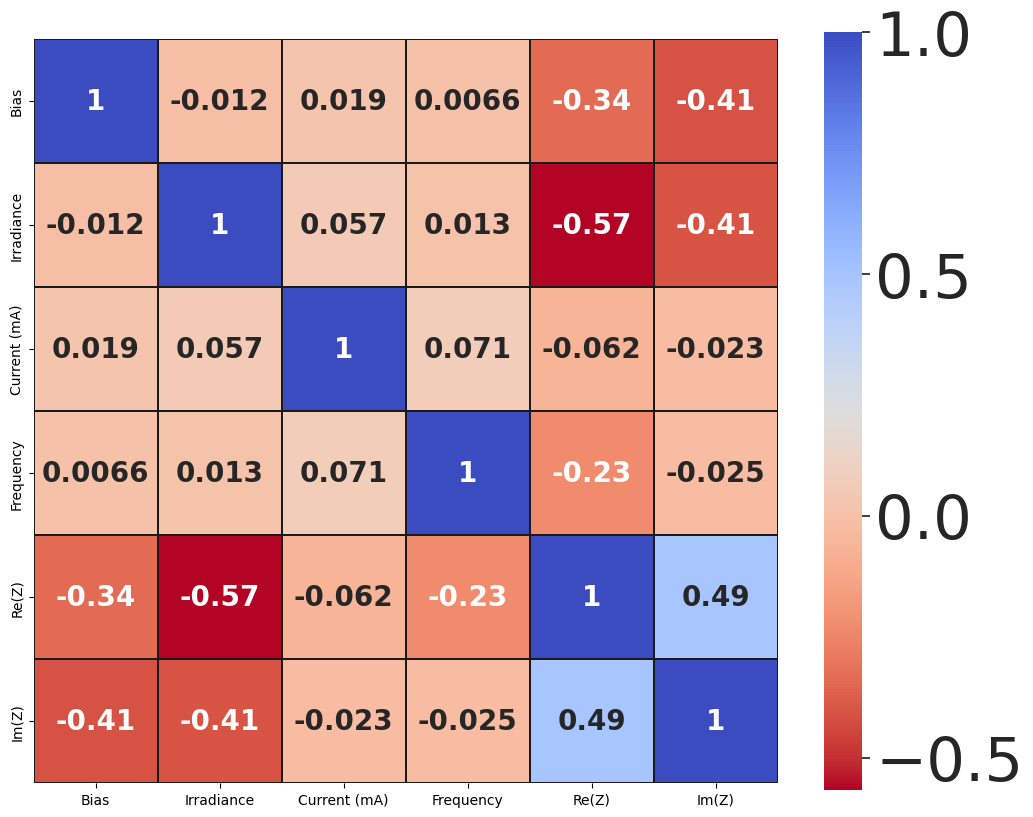

In [ ]:
f, ax = plt.subplots(figsize=(12, 12), facecolor = 'white')
#figure = f.get_figure()  
sns.set(font_scale=4.0)
sns.heatmap(dataset.astype(float).corr(),ax=ax,linewidths=0.25,vmax=1.0, square=True, cmap="coolwarm_r", linecolor='k',
            cbar_kws={"shrink": 0.82},annot=True,fmt='.2g',annot_kws={"size": 20, "fontweight": "bold"})

In [ ]:
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor

In [ ]:
#rng = np.random.RandomState(1)
X = dataset[['Bias',	'Irradiance',	'Current (mA)',	'Frequency']]
y = dataset[['Re(Z)','Im(Z)']]
from sklearn.utils import shuffle
X, y = shuffle(X,y, random_state = 5)
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
scalerx = MinMaxScaler(feature_range = (0,1))
scalery = MinMaxScaler(feature_range = (0,1))
#scalerx = RobustScaler()
#scalery = RobustScaler()
# training the scalar with range of data
scalerx.fit(X)
scalery.fit(y)
# Applying transformation
scaler_X = scalerx.transform(X)
scaler_y = scalery.transform(y)
               
max_depth = 25
regr_rf = RandomForestRegressor(n_estimators= 180, max_depth=max_depth, min_samples_leaf = 6, max_features = 3, min_samples_split = 5,
                                criterion = 'squared_error', bootstrap = True)
regr_rf.fit(X_train, y_train)

y_rf = regr_rf.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_score(y_test, y_rf)

0.9809507473599949

In [ ]:
MSE = mean_squared_error(y_test, y_rf)
MSE

0.00038579002104063116

In [ ]:
import math
RMSE = math.sqrt(MSE)
RMSE

0.019641538153633262

In [ ]:
mean_absolute_error(y_test, y_rf)

0.009052894399202548

In [ ]:
predictions = regr_rf.predict(X_train)
r2_score(y_train, predictions)

0.9870177309478542

In [ ]:
mean_absolute_error(y_train, predictions)

0.00742637540475747

In [ ]:
MSE1 = mean_squared_error(y_train, predictions)
MSE1

0.00027567765465273924

In [ ]:
RMSE1 = math.sqrt(MSE1)
RMSE1

0.01660354343665048

In [ ]:
predictions2 = regr_rf.predict(X_val)


In [ ]:
MSE2 = mean_squared_error(y_val, predictions2)
MSE2

0.00040377339532147224

In [ ]:
RMSE2 = math.sqrt(MSE2)
RMSE2

0.020094113449502377

In [ ]:
r2_score(y_val, predictions2)

0.9805272923451724

In [ ]:
mean_absolute_error(y_val, predictions2)

0.00900254879128378

In [ ]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (5594, 4) (5594, 2)
Validation set shape: (1399, 4) (1399, 2)
Testing set shape: (1749, 4) (1749, 2)


**5 fold CV**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
num_folds = 5
cv = KFold(n_splits=num_folds, shuffle=True, random_state=42)
scores = cross_val_score(regr_rf, scaler_X, scaler_y, cv=cv, scoring='neg_mean_squared_error')
mse_scores = -scores
print("Mean squared error scores: ", mse_scores)
print("Average mean squared error: {:.2f}".format(mse_scores.mean()))

Mean squared error scores:  [0.00039844 0.00040396 0.00037128 0.00033067 0.00039148]
Average mean squared error: 0.00


In [ ]:
y_rf_df = pd.DataFrame(y_rf)

In [ ]:
y_test_df = pd.DataFrame(y_test)

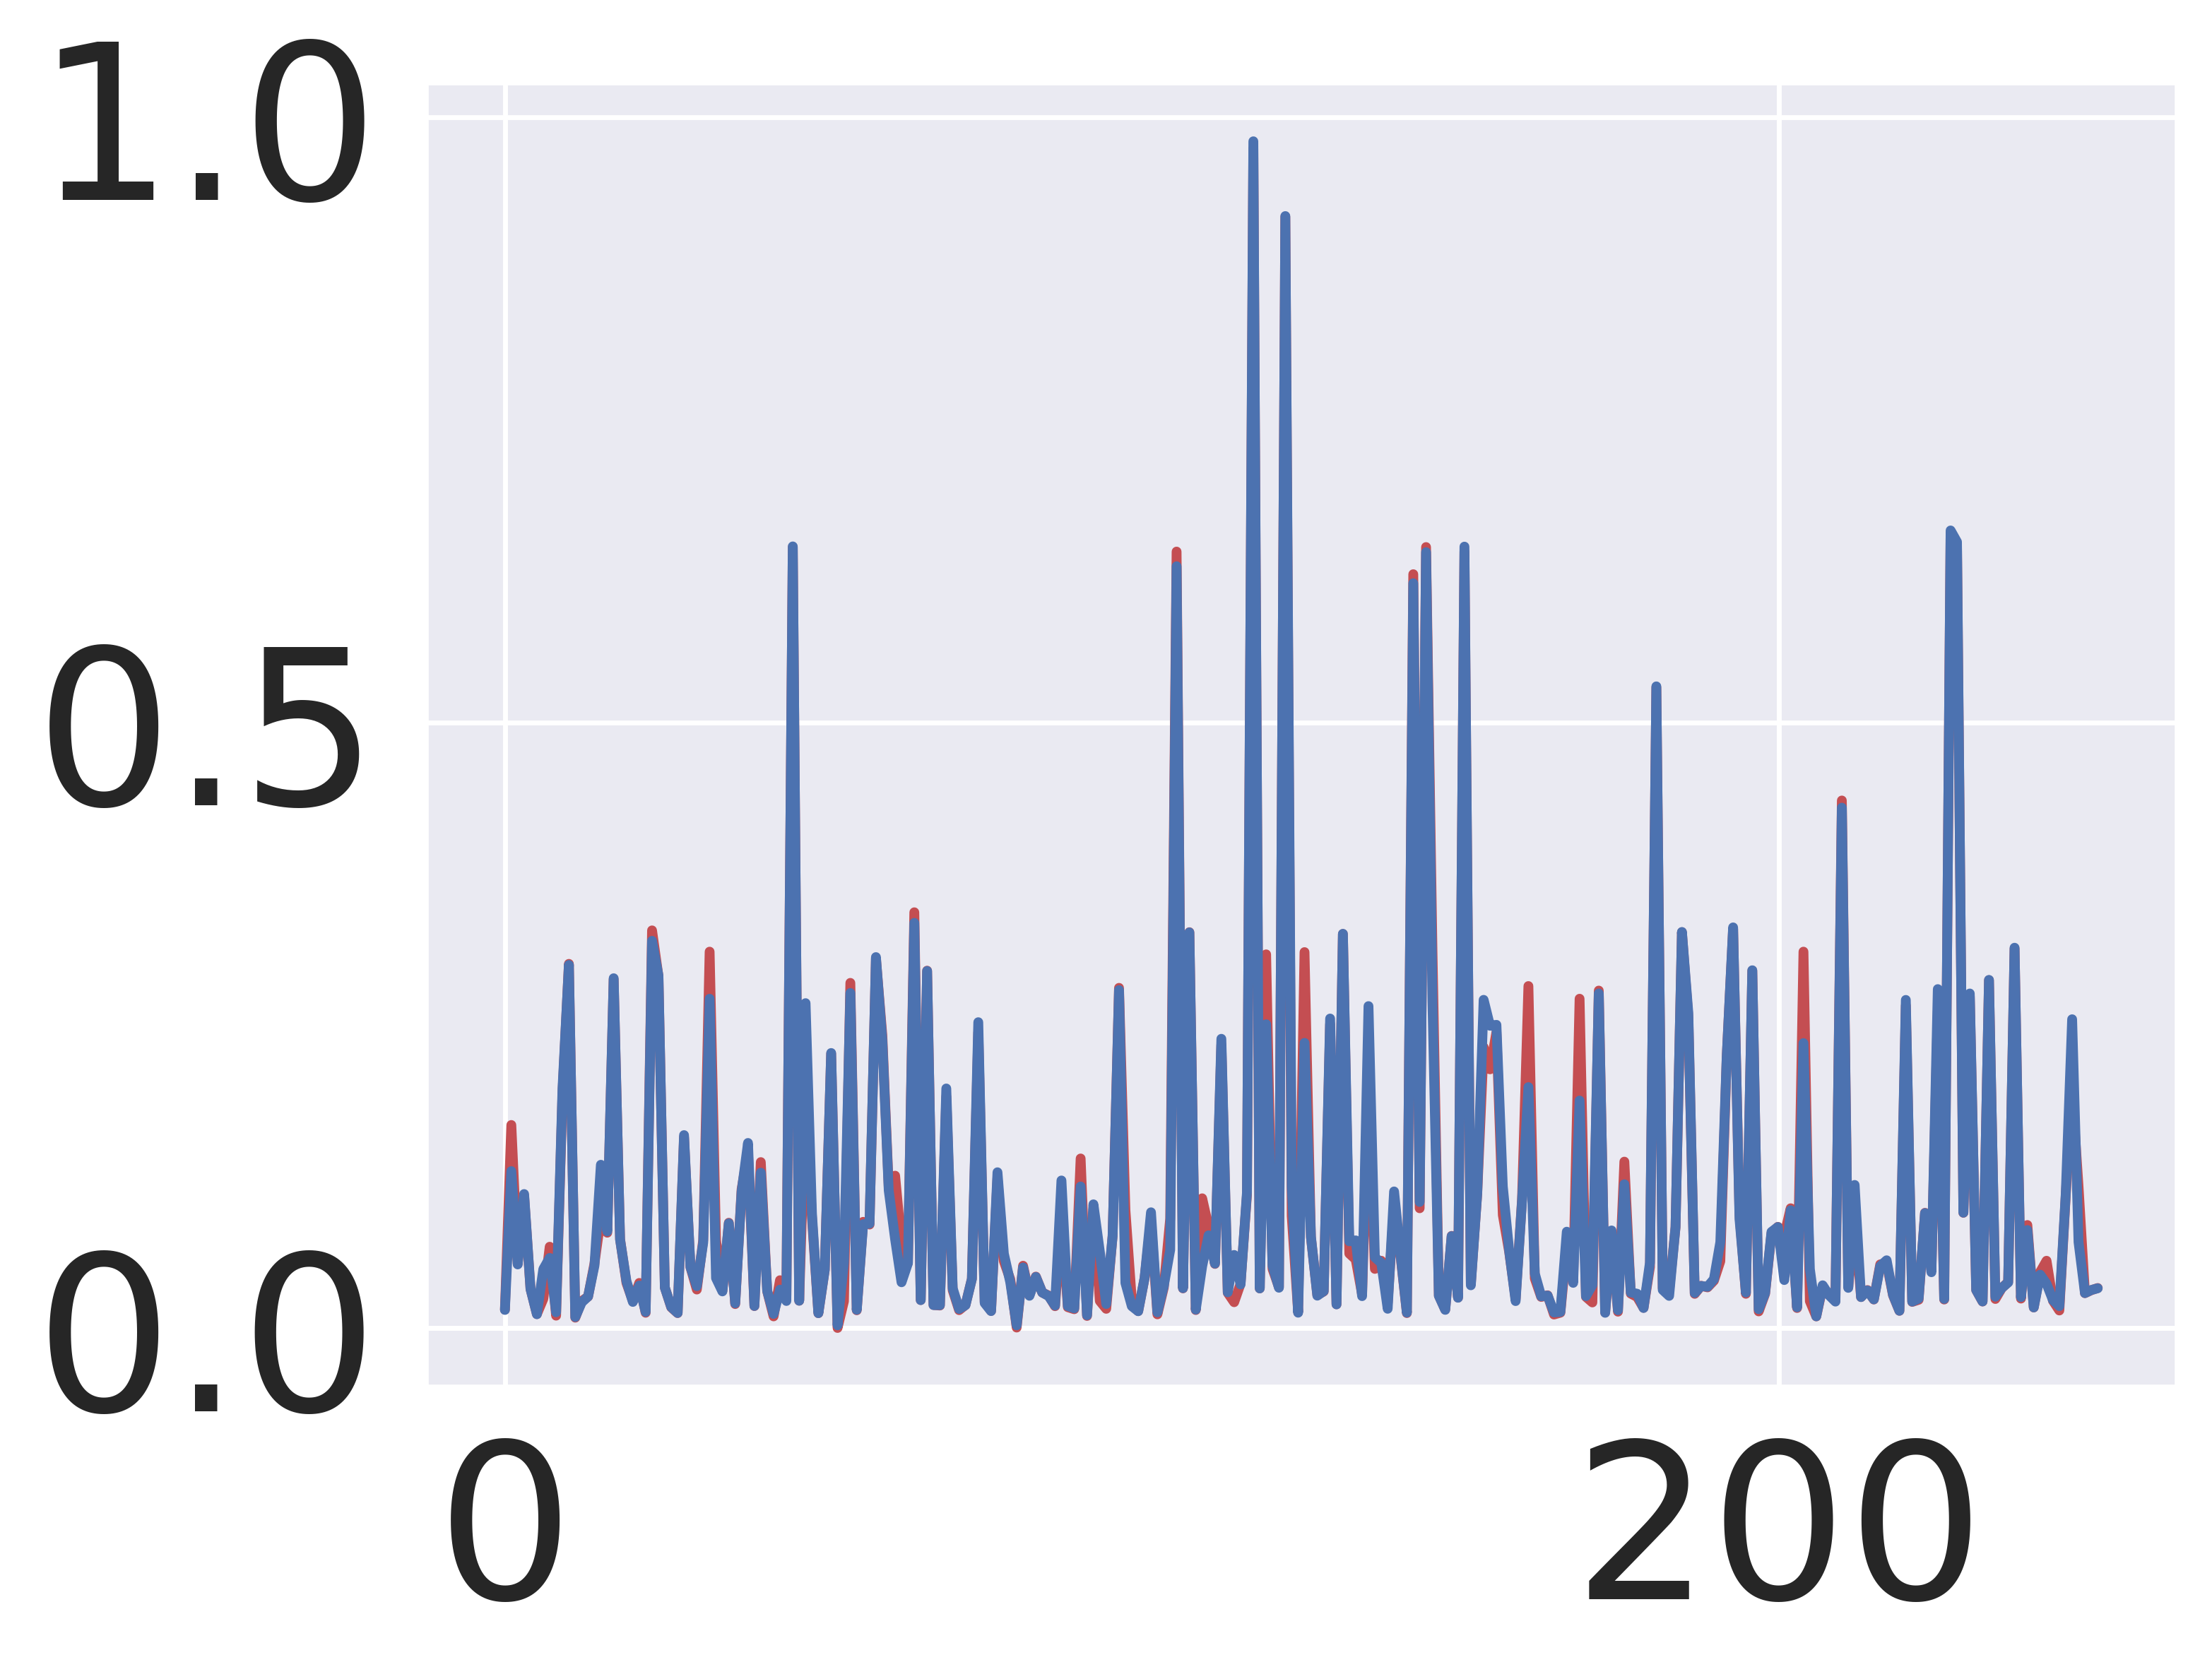

In [ ]:
from numpy import *
import math
t = linspace(0,250,250)
a = y_test_df.iloc[1:251,0:1].values
b = y_rf_df.iloc[1:251,0:1].values

plt.figure(dpi = 500, facecolor = 'white')
plt.plot(t,a,'r', label = "Experimental Value", linewidth = 2)
plt.plot(t,b, 'b', label = 'Predicted Value', linewidth = 2)
plt.show()

**New Data**

In [ ]:
test_df = pd.read_csv("/content/Test_X.csv")
test_df

,Bias,Irradiance,Current (mA),Frequency
0,0.6,495,0.00125,51.100
1,0.6,495,0.00125,47.900
2,0.6,495,0.00125,44.800
3,0.6,495,0.00125,41.900
4,0.6,495,0.00125,39.300
...,...,...,...,...
153,1.0,575,0.00253,0.390
154,1.0,575,0.00252,0.365
155,1.0,575,0.00252,0.342
156,1.0,575,0.00252,0.320


In [ ]:
test_df.dropna(axis = 1, inplace = True)

In [ ]:
test_df

,Bias,Irradiance,Current (mA),Frequency
0,0.6,495,0.00125,51.100
1,0.6,495,0.00125,47.900
2,0.6,495,0.00125,44.800
3,0.6,495,0.00125,41.900
4,0.6,495,0.00125,39.300
...,...,...,...,...
153,1.0,575,0.00253,0.390
154,1.0,575,0.00252,0.365
155,1.0,575,0.00252,0.342
156,1.0,575,0.00252,0.320


In [ ]:
scalerX_test = scalerx.transform(test_df)

In [ ]:
#scalerx_test = MinMaxScaler(feature_range = (0,1))
#scalerx_test.fit(test_df)
#scalerX_test = scalerx_test.transform(test_df)

In [ ]:
predictions1_df = regr_rf.predict(scalerX_test)

In [ ]:
#predictions1_df = regr_rf.predict(test_df)

In [ ]:
predictions1_df

array([[0.09528661, 0.06956099],
       [0.09528661, 0.06956099],
       [0.0953926 , 0.06961281],
       [0.09514057, 0.06951911],
       [0.09514057, 0.06951911],
       [0.09472981, 0.06933643],
       [0.09388977, 0.06902547],
       [0.09332231, 0.06881994],
       [0.09268681, 0.06859869],
       [0.09256182, 0.06855962],
       [0.09256182, 0.06855962],
       [0.09256182, 0.06855962],
       [0.09256182, 0.06855962],
       [0.09294953, 0.06873711],
       [0.09286506, 0.06873   ],
       [0.09314344, 0.06890328],
       [0.09314344, 0.06890328],
       [0.09314573, 0.06891847],
       [0.09314573, 0.06891847],
       [0.09305625, 0.06889015],
       [0.09300831, 0.06888093],
       [0.09300831, 0.06888093],
       [0.09300831, 0.06888093],
       [0.09352496, 0.06913875],
       [0.09352992, 0.06915318],
       [0.09328616, 0.06906533],
       [0.09328616, 0.06906533],
       [0.09302407, 0.06897667],
       [0.09318891, 0.06906488],
       [0.09318891, 0.06906488],
       [0.

In [ ]:
test_Y_df = pd.read_csv("/content/Test_Y.csv")
test_Y_df

,Re(Z),Im(Z)
0,273000.0,16200.0
1,273000.0,16800.0
2,274000.0,18800.0
3,274000.0,17700.0
4,274000.0,17500.0
...,...,...
153,232000.0,17600.0
154,247000.0,-316.0
155,245000.0,22800.0
156,247000.0,9520.0


In [ ]:
#test_Y_df.drop(['Re(Z)'], axis = 1, inplace = True)

In [ ]:
test_Y_df

,Re(Z),Im(Z)
0,273000.0,16200.0
1,273000.0,16800.0
2,274000.0,18800.0
3,274000.0,17700.0
4,274000.0,17500.0
...,...,...
153,232000.0,17600.0
154,247000.0,-316.0
155,245000.0,22800.0
156,247000.0,9520.0


In [ ]:
#test_Y_df.drop(columns = test_Y_df.iloc[:, 1:2].columns.tolist(), inplace = True)
#test_Y_df

In [ ]:
#scalery_test = MinMaxScaler(feature_range = (0,1))
#scalery_test.fit(test_Y_df)
#scalerY_test = scalery_test.transform(test_Y_df)

In [ ]:
scalerY_test = scalery.transform(test_Y_df)

In [ ]:
scalerY_test

array([[0.10056686, 0.06843854],
       [0.10056686, 0.06943522],
       [0.10094054, 0.07275748],
       [0.10094054, 0.07093023],
       [0.10094054, 0.07059801],
       [0.10168789, 0.07209302],
       [0.10206156, 0.07259136],
       [0.10243523, 0.07209302],
       [0.10280891, 0.07159468],
       [0.10280891, 0.07209302],
       [0.10280891, 0.0717608 ],
       [0.10318258, 0.07192691],
       [0.10392993, 0.07607973],
       [0.10355625, 0.07475083],
       [0.10392993, 0.07607973],
       [0.10392993, 0.07591362],
       [0.10467728, 0.07491694],
       [0.10505095, 0.07757475],
       [0.10542462, 0.07259136],
       [0.1057983 , 0.07973422],
       [0.10617197, 0.07624585],
       [0.10654565, 0.07425249],
       [0.10654565, 0.07724252],
       [0.10691932, 0.07524917],
       [0.10691932, 0.07707641],
       [0.10766667, 0.08139535],
       [0.10804034, 0.07774086],
       [0.10841402, 0.07641196],
       [0.10878769, 0.07807309],
       [0.10841402, 0.08172757],
       [0.

In [ ]:
r2_score(scalerY_test, predictions1_df)


-3.6602652879877433

In [ ]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(scalerY_test, predictions1_df)
MAE

0.027186730239085206

In [ ]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(scalerY_test, predictions1_df)
MSE

0.0011256467541180429

In [ ]:
import math
RMSE = math.sqrt(MSE)
RMSE

0.03355065951837673

In [ ]:
#MSE for each testing sample
#for i in range(len(Actual_df)):
  #mean_squared_error=mean_squared_error(test_Y_df[i],predictions1_df[i])
  #print("mse:.8f",mean_absolute_error)

In [ ]:
Actual_df = pd.DataFrame(scalerY_test)
predictions1_df = pd.DataFrame(predictions1_df)

In [ ]:
predictions1_df

,0,1
0,0.095287,0.069561
1,0.095287,0.069561
2,0.095393,0.069613
3,0.095141,0.069519
4,0.095141,0.069519
...,...,...
153,0.022544,0.046699
154,0.022544,0.046699
155,0.022544,0.046699
156,0.022544,0.046699


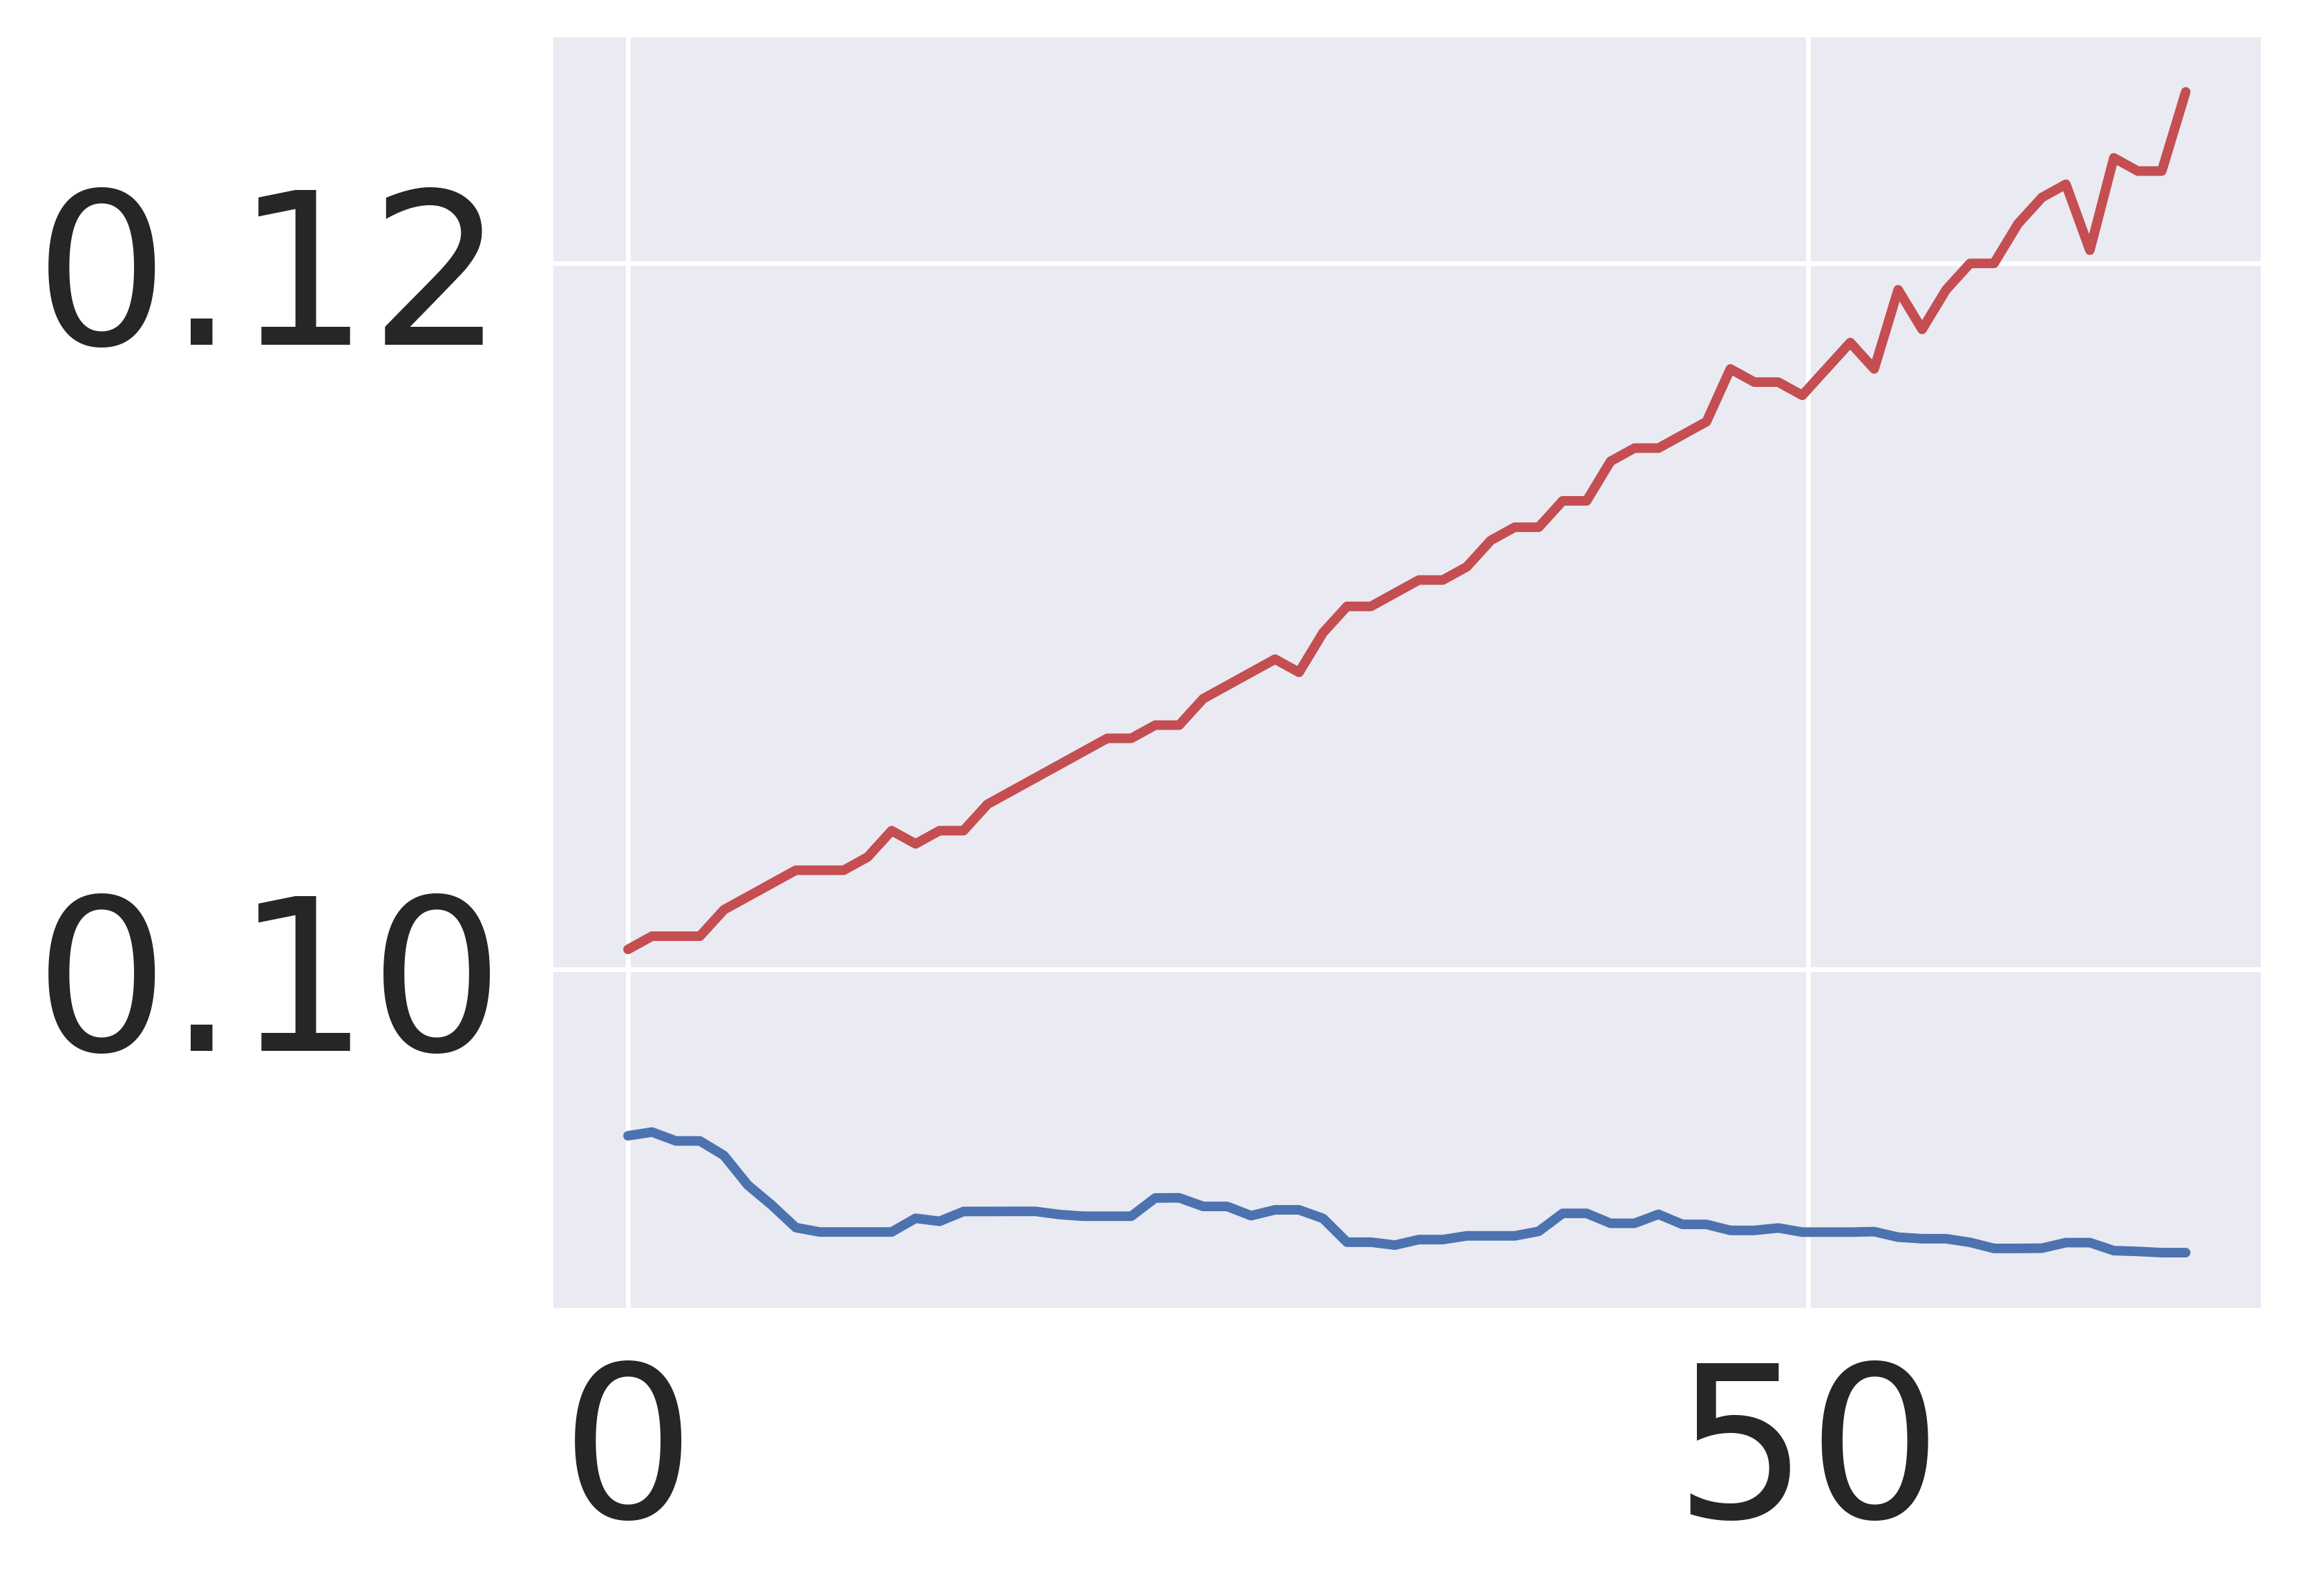

In [ ]:
from numpy import *
import math
t = linspace(0,66,66)
a = Actual_df.iloc[1:67,0:1].values
b = predictions1_df.iloc[1:67,0:1].values

plt.figure(dpi = 500, facecolor = 'white')
plt.plot(t,a,'r', label = "Experimental Value", linewidth = 2)
plt.plot(t,b, 'b', label = 'Predicted Value', linewidth = 2)
plt.show()

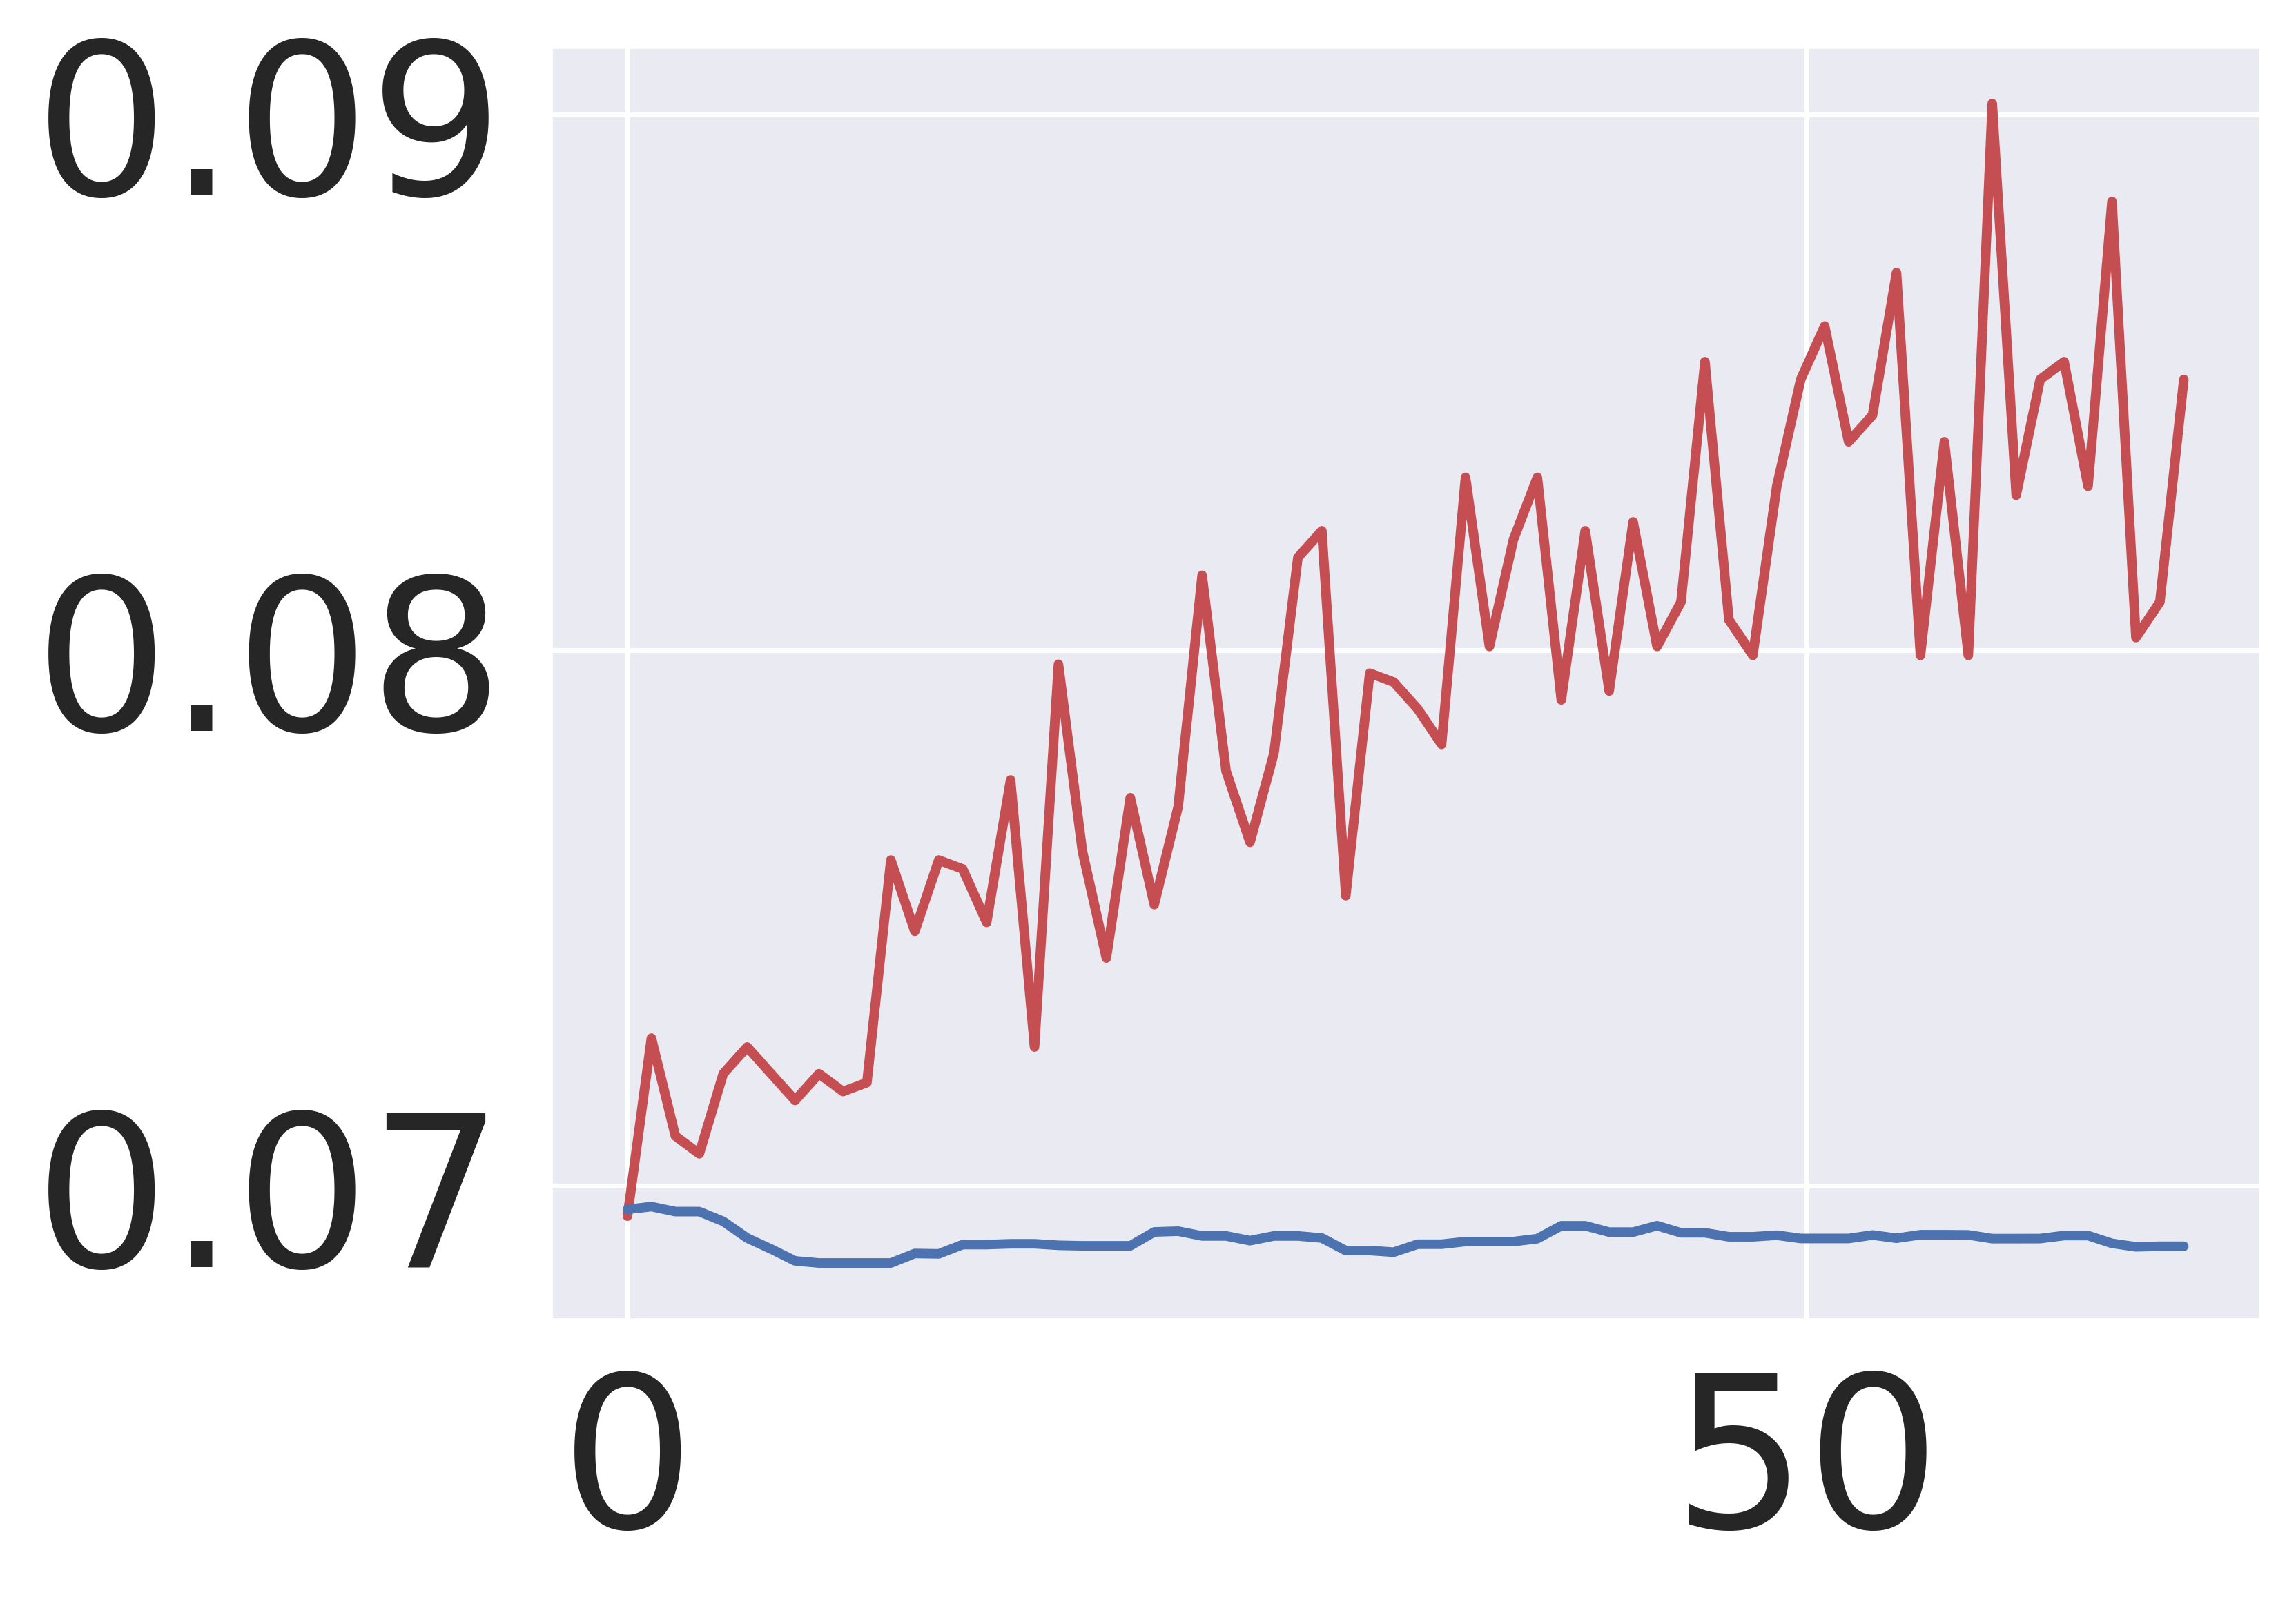

In [ ]:
from numpy import *
import math
t = linspace(0,66,66)
a = Actual_df.iloc[1:67,1:2].values
b = predictions1_df.iloc[1:67,1:2].values

plt.figure(dpi = 500, facecolor = 'white')
plt.plot(t,a,'r', label = "Experimental Value", linewidth = 2)
plt.plot(t,b, 'b', label = 'Predicted Value', linewidth = 2)
plt.show()

In [ ]:
Actual_df.to_csv('Actual Output.csv')
predictions1_df.to_csv('Predicted Output.csv')

In [ ]:
Unscaled_Actual_df = scalery.inverse_transform(scalerY_test)
Unscaled_predictions1_df = scalery.inverse_transform(predictions1_df)

In [ ]:
Unscaled_Actual_df = pd. DataFrame(Unscaled_Actual_df)
Unscaled_predictions1_df = pd.DataFrame(Unscaled_predictions1_df)

In [ ]:
Unscaled_Actual_df.to_csv('Unscaled Actual.csv')
Unscaled_predictions1_df.to_csv('Unscaled Predicted.csv')